Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV,train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import precision_score,f1_score,recall_score,classification_report,accuracy_score
import xgboost as xgb

In [3]:
train_data=pd.read_csv("C:/Users/srvik/Desktop/github/microsoft data/GUIDE_Train.csv", low_memory=False)
test_data=pd.read_csv("C:/Users/srvik/Desktop/github/microsoft data/GUIDE_Test.csv", low_memory=False)

In [8]:
print(train_data)
print(test_data)

                    Id  OrgId  IncidentId  AlertId                 Timestamp  \
0         180388628218      0         612   123247  2024-06-04T06:05:15.000Z   
1         455266534868     88         326   210035  2024-06-14T03:01:25.000Z   
2        1056561957389    809       58352   712507  2024-06-13T04:52:55.000Z   
3        1279900258736     92       32992   774301  2024-06-10T16:39:36.000Z   
4         214748368522    148        4359   188041  2024-06-15T01:08:07.000Z   
...                ...    ...         ...      ...                       ...   
9516832  1056561956622      0          90   496631  2024-06-08T15:26:08.000Z   
9516833  1228360650033     59      196410   748366  2024-06-06T09:40:08.000Z   
9516834   867583395122     44       14117     7425  2024-06-11T22:51:03.000Z   
9516835   395136991850     43         644     8973  2024-05-20T23:01:01.000Z   
9516836   678604833923     16      141721   644106  2024-06-03T23:51:52.000Z   

         DetectorId  AlertTitle        

In [4]:
#checking data for null values
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       5468386
IncidentGrade           51340
ActionGrouped         9460773
ActionGranular        9460773
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        9420025
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          9441956
FileName                    0
FolderPath

In [5]:
#drop null value cloumn with more than 80%data is null
train_data=train_data.drop(['MitreTechniques','ActionGrouped','ActionGranular','EmailClusterId','ThreatFamily','ResourceType','Roles',
                'AntispamDirection','SuspicionLevel','LastVerdict'],axis=1)
test_data=test_data.drop(['MitreTechniques','ActionGrouped','ActionGranular','EmailClusterId','ThreatFamily','ResourceType','Roles',
                'AntispamDirection','SuspicionLevel','LastVerdict'],axis=1)

                          Id     OrgId  IncidentId   AlertId  DetectorId  \
Id                  1.000000  0.007336    0.014532  0.009207    0.003071   
OrgId               0.007336  1.000000    0.026038  0.164287    0.166280   
IncidentId          0.014532  0.026038    1.000000  0.413221    0.059410   
AlertId             0.009207  0.164287    0.413221  1.000000    0.136389   
DetectorId          0.003071  0.166280    0.059410  0.136389    1.000000   
AlertTitle          0.008825  0.011603    0.137387  0.162036    0.266043   
DeviceId            0.003295  0.007714   -0.035787 -0.059150   -0.029402   
Sha256              0.002825  0.002947   -0.024252  0.006913   -0.021061   
IpAddress           0.012587  0.116409    0.135114  0.085904    0.043657   
Url                -0.009754  0.011526   -0.022715  0.065921    0.040892   
AccountSid         -0.003866 -0.034954   -0.035174 -0.096841    0.004608   
AccountUpn         -0.004486 -0.026358   -0.002902  0.017136    0.014782   
AccountObjec

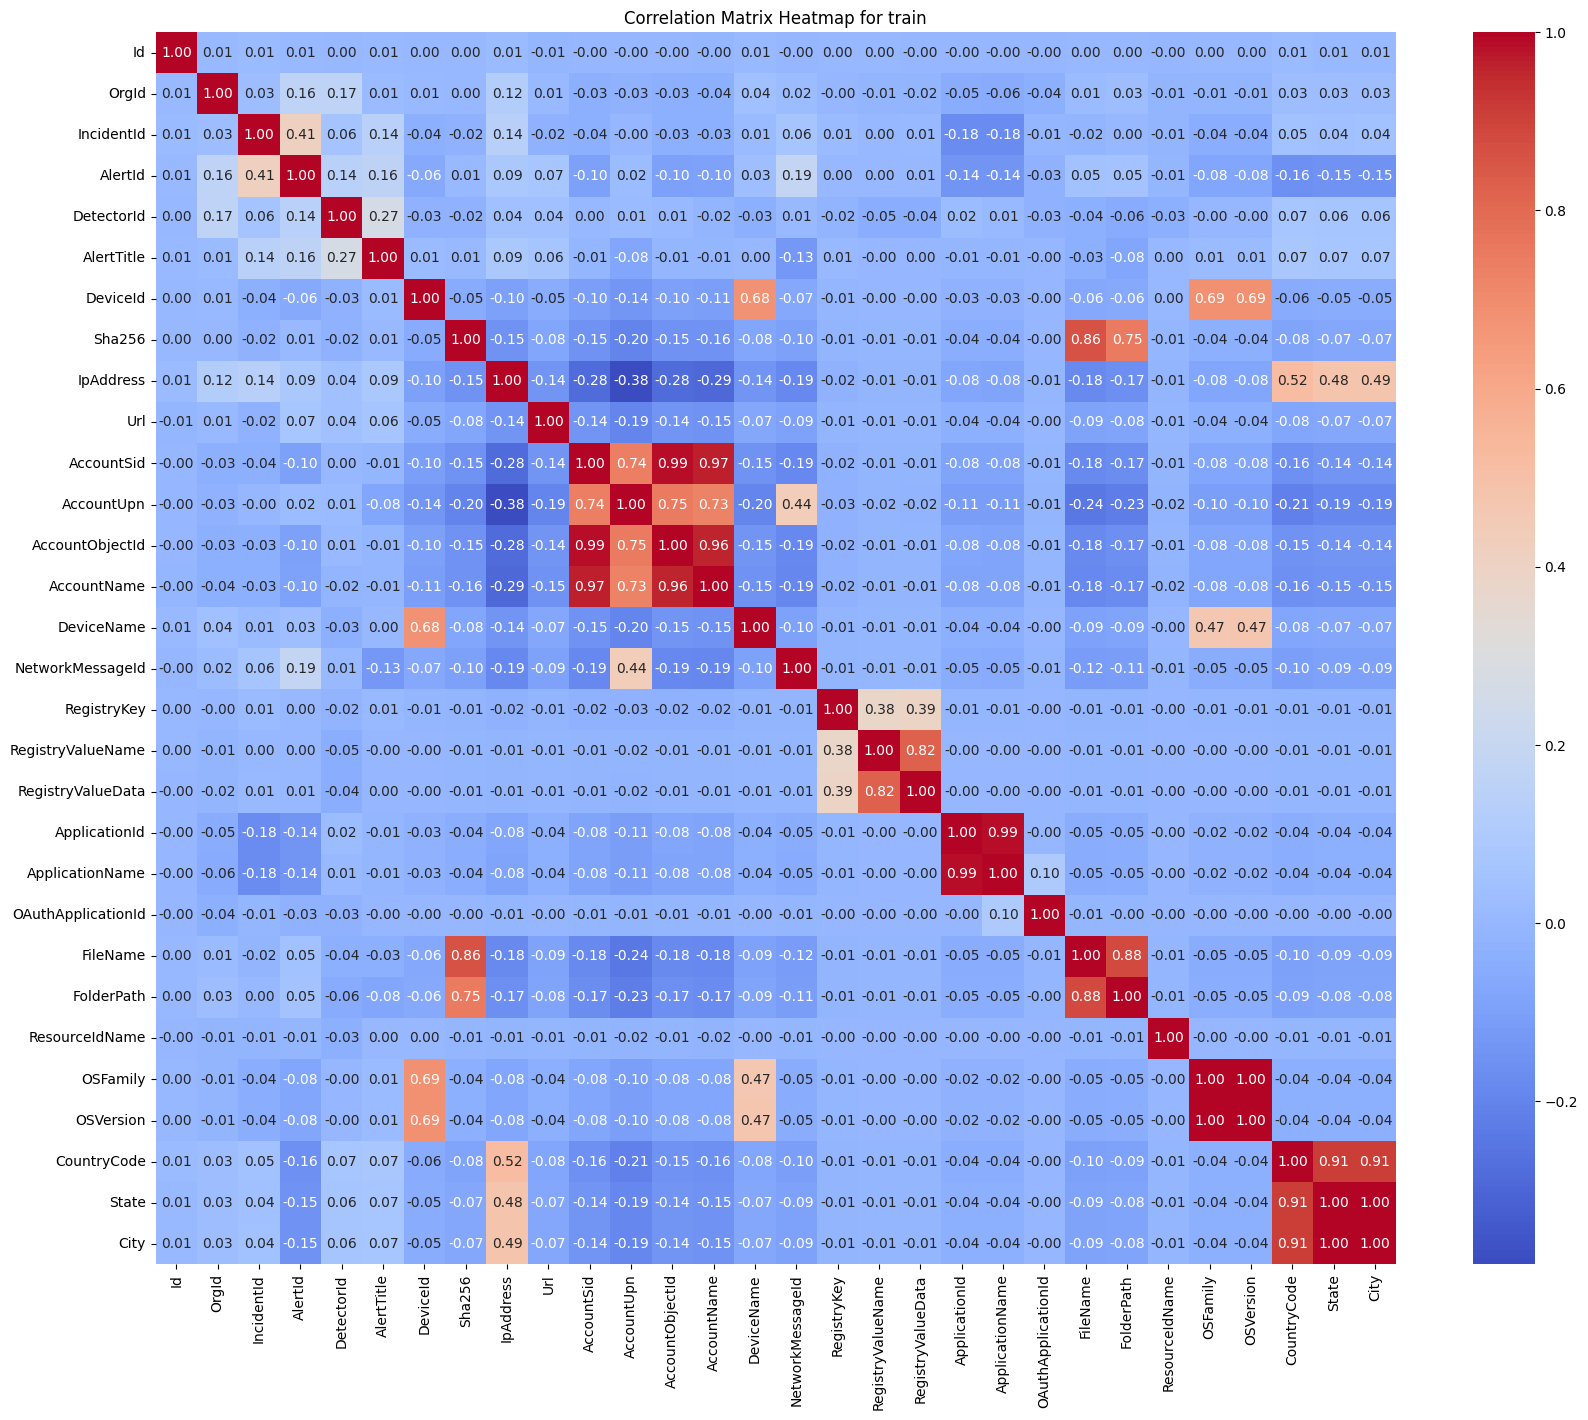

                     Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
Id                  1.0    NaN         NaN      NaN         NaN         NaN   
OrgId               NaN    1.0         NaN      NaN         NaN         NaN   
IncidentId          NaN    NaN         1.0      NaN         NaN         NaN   
AlertId             NaN    NaN         NaN      1.0         NaN         NaN   
DetectorId          NaN    NaN         NaN      NaN         1.0         NaN   
AlertTitle          NaN    NaN         NaN      NaN         NaN         1.0   
DeviceId            NaN    NaN         NaN      NaN         NaN         NaN   
Sha256              NaN    NaN         NaN      NaN         NaN         NaN   
IpAddress           NaN    NaN         NaN      NaN         NaN         NaN   
Url                 NaN    NaN         NaN      NaN         NaN         NaN   
AccountSid          NaN    NaN         NaN      NaN         NaN         NaN   
AccountUpn          NaN    NaN         NaN      NaN 

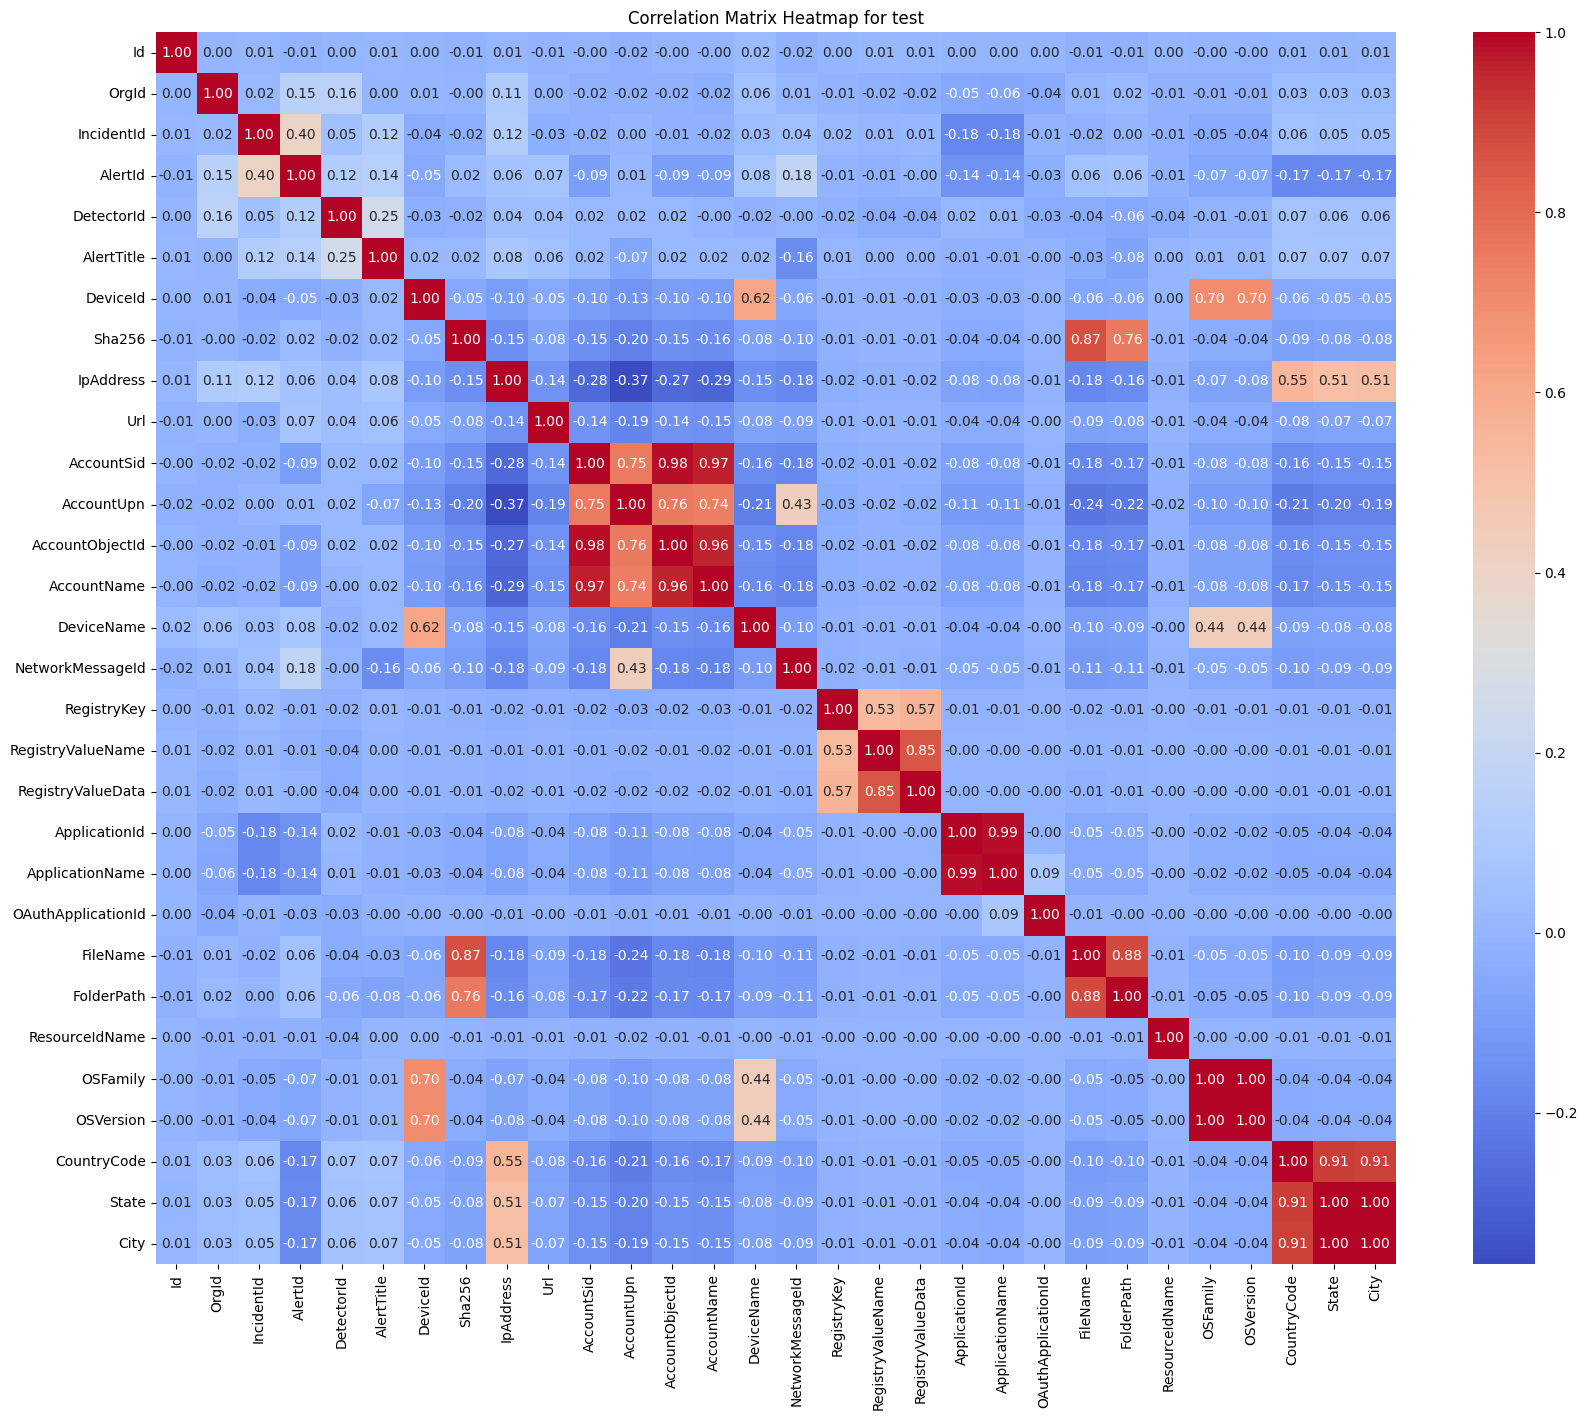

                     Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
Id                  1.0    NaN         NaN      NaN         NaN         NaN   
OrgId               NaN    1.0         NaN      NaN         NaN         NaN   
IncidentId          NaN    NaN         1.0      NaN         NaN         NaN   
AlertId             NaN    NaN         NaN      1.0         NaN         NaN   
DetectorId          NaN    NaN         NaN      NaN         1.0         NaN   
AlertTitle          NaN    NaN         NaN      NaN         NaN         1.0   
DeviceId            NaN    NaN         NaN      NaN         NaN         NaN   
Sha256              NaN    NaN         NaN      NaN         NaN         NaN   
IpAddress           NaN    NaN         NaN      NaN         NaN         NaN   
Url                 NaN    NaN         NaN      NaN         NaN         NaN   
AccountSid          NaN    NaN         NaN      NaN         NaN         NaN   
AccountUpn          NaN    NaN         NaN      NaN 

In [6]:
numeric_col= train_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_col.corr()
print(correlation_matrix)
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap for train')
plt.show()

threshold = 0.6
high_corr = correlation_matrix[correlation_matrix > threshold]
print(high_corr)

numeric_col= test_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_col.corr()
print(correlation_matrix)
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap for test')
plt.show()

threshold = 0.6
high_corr = correlation_matrix[correlation_matrix > threshold]
print(high_corr)

In [7]:
#dropping 60% correlated column 
train_data=train_data.drop(['ApplicationName','FileName','FolderPath','State','City','OSVersion','OSFamily','DeviceName',
                'RegistryValueData','RegistryKey','AccountName','AccountUpn','AccountSid','RegistryValueData','RegistryKey'],axis=1)
test_data=test_data.drop(['ApplicationName','FileName','FolderPath','State','City','OSVersion','OSFamily','DeviceName',
                'RegistryValueData','RegistryKey','AccountName','AccountUpn','AccountSid','RegistryValueData','RegistryKey'],axis=1)

In [ ]:
#feature engineeering
train_data['Timestamp'] = pd.to_datetime(train_data['Timestamp'], errors='coerce')
test_data['Timestamp'] = pd.to_datetime(test_data['Timestamp'], errors='coerce')

train_data['Timestamp'].head()
train_data["Day"]=train_data["Timestamp"].dt.day
train_data["Month"]=train_data["Timestamp"].dt.month
train_data["Year"]=train_data["Timestamp"].dt.year
train_data["Hour"]=train_data["Timestamp"].dt.hour
train_data["Time"]=train_data["Timestamp"].dt.time

test_data['Timestamp'].head()
test_data["Day"]=test_data["Timestamp"].dt.day
test_data["Month"]=test_data["Timestamp"].dt.month
test_data["Year"]=test_data["Timestamp"].dt.year
test_data["Hour"]=test_data["Timestamp"].dt.hour
test_data["Time"]=test_data["Timestamp"].dt.time

In [12]:
train_data=train_data.drop('Timestamp',axis=1)
test_data=test_data.drop('Timestamp',axis=1)

In [13]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Id                        0
OrgId                     0
IncidentId                0
AlertId                   0
DetectorId                0
AlertTitle                0
Category                  0
IncidentGrade         51340
EntityType                0
EvidenceRole              0
DeviceId                  0
Sha256                    0
IpAddress                 0
Url                       0
AccountObjectId           0
NetworkMessageId          0
RegistryValueName         0
ApplicationId             0
OAuthApplicationId        0
ResourceIdName            0
CountryCode               0
Day                       0
Month                     0
Year                      0
Hour                      0
Time                      0
dtype: int64
Id                    0
OrgId                 0
IncidentId            0
AlertId               0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId           

In [36]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9465497 entries, 0 to 9516836
Data columns (total 26 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   DetectorId          int64 
 5   AlertTitle          int64 
 6   Category            object
 7   IncidentGrade       object
 8   EntityType          object
 9   EvidenceRole        object
 10  DeviceId            int64 
 11  Sha256              int64 
 12  IpAddress           int64 
 13  Url                 int64 
 14  AccountObjectId     int64 
 15  NetworkMessageId    int64 
 16  RegistryValueName   int64 
 17  ApplicationId       int64 
 18  OAuthApplicationId  int64 
 19  ResourceIdName      int64 
 20  CountryCode         int64 
 21  Day                 int32 
 22  Month               int32 
 23  Year                int32 
 24  Hour                int32 
 25  Time                obj

In [37]:
train_data=train_data.drop('Time',axis=1)
test_data=test_data.drop('Time',axis=1)

In [38]:
train_data=train_data.dropna()

In [39]:
# Separate features and target
X_train = train_data.drop(columns=['IncidentGrade'])
y_train = train_data['IncidentGrade']
X_test = test_data.drop(columns=['IncidentGrade'])
y_test = test_data['IncidentGrade']

In [51]:
#encoding target
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

In [41]:
# Select column names for numeric and categorical columns
train_numeric_col = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
train_categorical_col = X_train.select_dtypes(include='object').columns.tolist()

test_numeric_col = X_test.select_dtypes(include=['float64', 'int64']).columns.tolist()
test_categorical_col = X_test.select_dtypes(include='object').columns.tolist()

In [42]:
# Create transformations for numeric and categorical columns
train_preprocessor=ColumnTransformer(transformers=[('num',StandardScaler(),train_numeric_col),('cat',OneHotEncoder(handle_unknown='ignore'),train_categorical_col)])
test_preprocessor=ColumnTransformer(transformers=[('num',StandardScaler(),test_numeric_col),('cat',OneHotEncoder(handle_unknown='ignore'),test_categorical_col)])

In [47]:
# Transform the training and testing data
X_train_transformed = train_preprocessor.fit_transform(X_train)
X_test_transformed = train_preprocessor.transform(X_test)


In [48]:
print(X_train_transformed)
print(X_test_transformed)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 189309940 stored elements and shape (9465497, 72)>
  Coords	Values
  (0, 0)	-1.333971571880159
  (0, 1)	-0.4745535964344002
  (0, 2)	-0.5789782882495322
  (0, 3)	-0.612504268150131
  (0, 4)	-0.23726615168468876
  (0, 5)	-0.25373510108343
  (0, 6)	0.1917676471675922
  (0, 7)	0.2817376476551367
  (0, 8)	-2.0163996430071607
  (0, 9)	0.26910401031954884
  (0, 10)	0.5249126016160728
  (0, 11)	0.35093621269254366
  (0, 12)	0.021160781421578047
  (0, 13)	0.1514947698082423
  (0, 14)	0.01588369336958611
  (0, 15)	0.027939584211372128
  (0, 16)	-3.0590341548612963
  (0, 27)	1.0
  (0, 52)	1.0
  (0, 71)	1.0
  (1, 0)	-0.7800889725038209
  (1, 1)	-0.23964111562627727
  (1, 2)	-0.5813853798693381
  (1, 3)	-0.42227340456518303
  (1, 4)	-0.1155324266132383
  :	:
  (9465495, 15)	0.027939584211372128
  (9465495, 16)	0.2926824280629985
  (9465495, 26)	1.0
  (9465495, 52)	1.0
  (9465495, 71)	1.0
  (9465496, 0)	-0.3300593607082693
  (9465496, 1)

In [49]:
# Convert the processed data to a DMatrix structure and enable GPU
dtrain = xgb.DMatrix(X_train_transformed, label=y_train_encoded)
dtest = xgb.DMatrix(X_test_transformed, label=y_test_encoded)

In [54]:
model = xgb.train(
    params = {
    'objective': 'multi:softmax',  # Assuming multi-class classification
    'num_class': len(label_encoder.classes_),  # Number of unique classes
    'tree_method': 'hist',          # Use histogram-based algorithm
    'device': 'cuda',               # Set device to GPU (CUDA)
    'max_depth': 8,
    'learning_rate': 0.1,
    'random_state': 100
    ,'gamma' : 0
    ,'colsample_bytree':0.8
    ,'learning_rate':0.2
    ,'subsample':1.0
    ,'max_depth':10
    ,'random_state':100}
    ,
    dtrain=dtrain,
    num_boost_round=200
)

# Make predictions using GPU-based DMatrix
pred1 = model.predict(dtrain)
pred2 = model.predict(dtest)

# Convert predictions back to integer labels
pred1 = pred1.astype(int)
pred2 = pred2.astype(int)


In [55]:
def metrics(actual, predicted):
    acc = accuracy_score(actual, predicted) * 100
    prec = precision_score(actual, predicted, average="macro") * 100
    recall = recall_score(actual, predicted, average="macro") * 100
    macro_f1 = f1_score(actual, predicted, average="macro") * 100

    return pd.DataFrame({
        "Metrics": ["Accuracy", "Precision", "Recall", "Macro F1"],
        "Values": [acc, prec, recall, macro_f1]
    }).set_index("Metrics")

In [58]:
# Evaluate metrics
train_metrics = metrics(y_train_encoded, pred1)
test_metrics = metrics(y_test_encoded, pred2)

print(pd.DataFrame({
    "Training": train_metrics["Values"],
    "Testing": test_metrics["Values"]
}).reset_index())

     Metrics   Training    Testing
0   Accuracy  96.063017  91.313508
1  Precision  96.106367  91.061442
2     Recall  95.611228  90.316809
3   Macro F1  95.848125  90.662111
